# Setup

In [1]:
#ausführen!!!

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

import folium #for the map view of all airports

#loading the Dataset into a pandas dataframe
df = pd.read_csv('Airlines.csv')
allAirports = pd.read_csv('hopefullyAllAirports.csv')

# Stage 1 (Analysis)
interesting charts


data head:
   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0

data shape:
(539383, 9)

data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Le

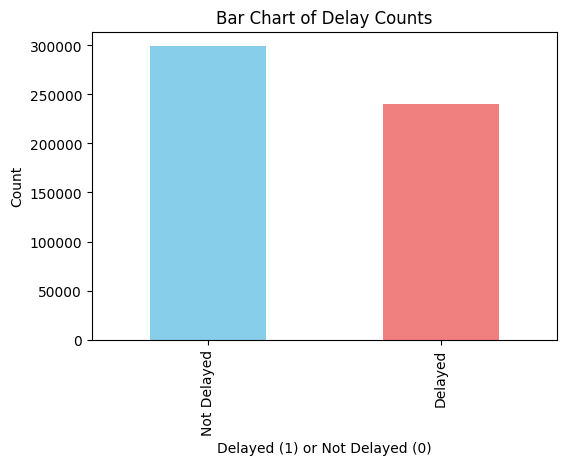

<Figure size 1200x600 with 0 Axes>

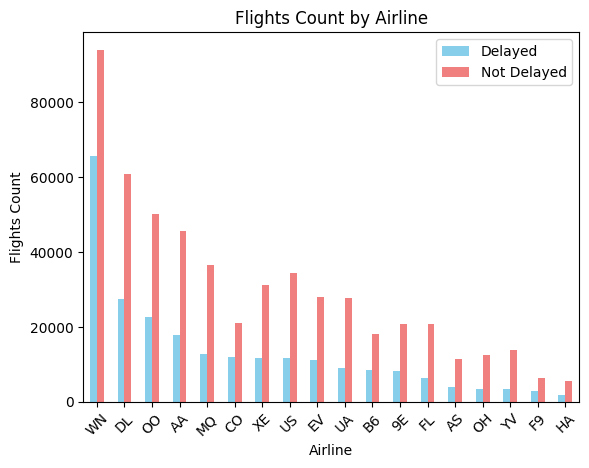

<Figure size 800x400 with 0 Axes>

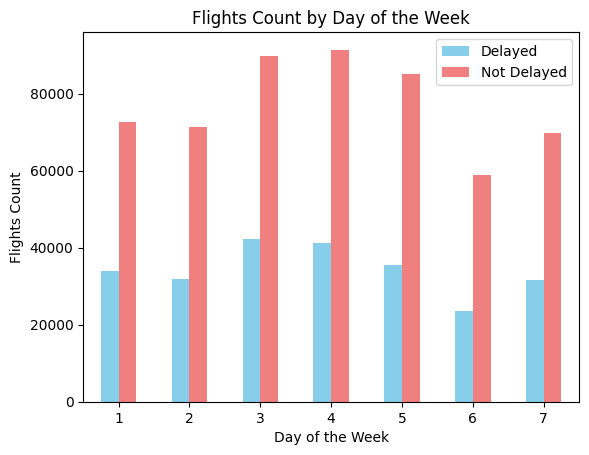

<Figure size 1200x600 with 0 Axes>

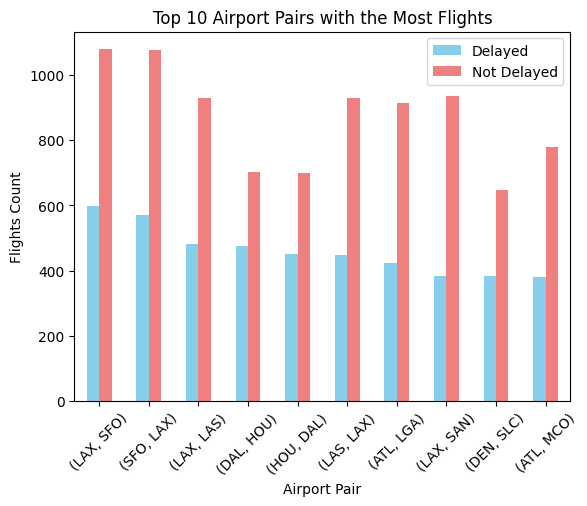

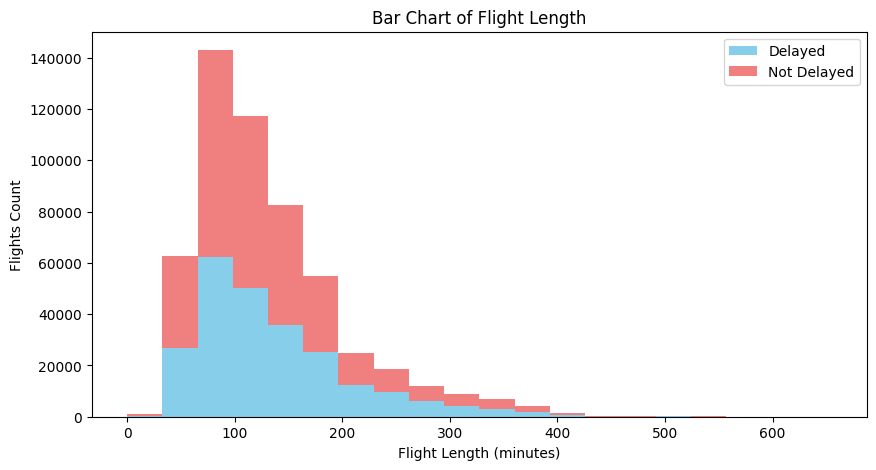

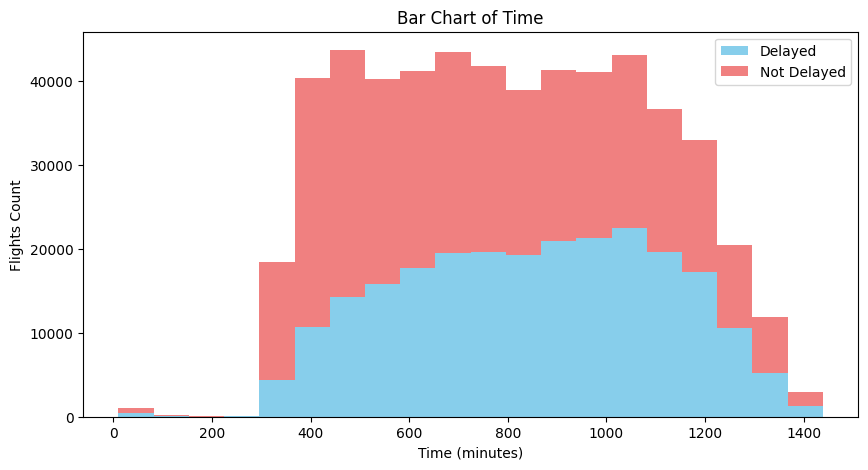

In [10]:
print("\ndata head:")
print(df.head()) #Check table composition

print("\ndata shape:")
print(df.shape) #How many entries are there? (Get height and width of Dataset)

print("\ndata info:")
print(df.info()) #Check for empty datatuple

print("\ndata discription:")
print(df.describe()) #Data visualization -> Mean etc.

#Outliers -> Only binary decision -> no problem
duplicate_values = df.duplicated()
if duplicate_values.any:
    print("\nNo duplicates")
else:    
    print("\nDuplicates found")
    print(duplicate_values)


duplicate_values = df['id'].duplicated()
if duplicate_values.any:
    print("\nNo duplicates id")
else:    
    print("\nDuplicates found id")
    print(duplicate_values)


# Farben für Delayed und Not Delayed festlegen
colors = ['lightcoral', 'skyblue']

# 1. Bar Chart of Delay Counts
delay_counts = df['Delay'].value_counts()

plt.figure(figsize=(6, 4))
delay_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Delayed (1) or Not Delayed (0)')
plt.ylabel('Count')
plt.title('Bar Chart of Delay Counts')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])
plt.show()

#2. Chart of Country and Delay Count
delay_counts_by_airline = df.groupby('Airline')['Delay'].agg(['sum', 'count'])
delay_counts_by_airline = delay_counts_by_airline.sort_values(by='sum', ascending=False)

plt.figure(figsize=(12, 6))
delay_counts_by_airline.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Airline')
plt.ylabel('Flights Count')
plt.title('Flights Count by Airline')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=45)
plt.show()
# 3. Bar Chart of Day of the Week vs. Delay Counts
day_counts = df.groupby('DayOfWeek')['Delay'].agg(['sum', 'count'])
plt.figure(figsize=(8, 4))
day_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Day of the Week')
plt.ylabel('Flights Count')
plt.title('Flights Count by Day of the Week')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=0)
plt.show()

# 4. Bar Chart of Airport Pairs and Delay Counts
airport_pairs_counts = df.groupby(['AirportFrom', 'AirportTo'])['Delay'].agg(['sum', 'count']).nlargest(10, 'sum')
plt.figure(figsize=(12, 6))
airport_pairs_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Airport Pair')
plt.ylabel('Flights Count')
plt.title('Top 10 Airport Pairs with the Most Flights')
plt.legend(['Delayed', 'Not Delayed'])
plt.xticks(rotation=45)
plt.show()

# 5. Bar Chart of Flight Length
plt.figure(figsize=(10, 5))
plt.hist([df[df['Delay'] == 1]['Length'], df[df['Delay'] == 0]['Length']], bins=20, color=['skyblue', 'lightcoral'], stacked=True)
plt.xlabel('Flight Length (minutes)')
plt.ylabel('Flights Count')
plt.title('Bar Chart of Flight Length')
plt.legend(['Delayed', 'Not Delayed'])
plt.show()

# 6. Bar Chart of Time
plt.figure(figsize=(10, 5))
plt.hist([df[df['Delay'] == 1]['Time'], df[df['Delay'] == 0]['Time']], bins=20, color=['skyblue', 'lightcoral'], stacked=True)
plt.xlabel('Time (minutes)')
plt.ylabel('Flights Count')
plt.title('Bar Chart of Time')
plt.legend(['Delayed', 'Not Delayed'])
plt.show()




In [3]:
dfFrom = df["AirportFrom"].unique()
dfTo = df["AirportTo"].unique()

# Concatenate those two arrays to one
dfAirports = np.concatenate((dfFrom, dfTo), axis=None)

# Remove duplicates
dfAirports = np.unique(dfAirports)
print("\nAirports count:")
print(dfAirports.shape)

# Convert dfAirports to a DataFrame
dfAirports = pd.DataFrame({'iata_code': dfAirports})

# Convert 'iata_code' columns to strings
dfAirports['iata_code'] = dfAirports['iata_code'].astype(str)
allAirports['iata_code'] = allAirports['iata_code'].astype(str)

# Merge dataframes based on the 'iata_code' column
merged_dataframe = pd.merge(dfAirports, allAirports, on='iata_code', how='left')

print("\nmerged_dataframe:")
print(merged_dataframe)


# Extract latitude and longitude from the 'coordinates' column
merged_dataframe[['longitude', 'latitude']] = merged_dataframe['coordinates'].str.split(', ', expand=True).astype(float)

# Create a folium map centered around the first entry
m = folium.Map(location=[merged_dataframe['latitude'].iloc[0], merged_dataframe['longitude'].iloc[0]], zoom_start=10)

# Add markers for each entry
for index, row in merged_dataframe.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# Display the map
m




Airports count:
(293,)

merged_dataframe:
    iata_code ident            type                                  name  \
0         ABE  KABE  medium_airport   Lehigh Valley International Airport   
1         ABI  KABI  medium_airport              Abilene Regional Airport   
2         ABQ  KABQ   large_airport     Albuquerque International Sunport   
3         ABR  KABR  medium_airport             Aberdeen Regional Airport   
4         ABY  KABY  medium_airport    Southwest Georgia Regional Airport   
..        ...   ...             ...                                   ...   
288       VPS  KVPS   large_airport        Destin-Ft Walton Beach Airport   
289       WRG  PAWG  medium_airport                      Wrangell Airport   
290       XNA  KXNA  medium_airport   Northwest Arkansas Regional Airport   
291       YAK  PAYA  medium_airport                       Yakutat Airport   
292       YUM  KNYL  medium_airport  Yuma MCAS/Yuma International Airport   

     elevation_ft continent iso_

# Stage 2 (df Preperation)

In [2]:
#ausführen!!!

# Select features and target variable
features = ['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']
target = 'Delay'

X = df[features]
y = df[target]

# Randomly split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing

# Combine the training and testing data to ensure consistent one-hot encoding
combined_data = pd.concat([X_train, X_test])


# Display the first few rows of each split dfFrame
print("Training Set:")
print(X_train.head())

print("\nTraining Set Delay:")
print(y_train.head())

print("Training Set:")
print(X_test.head())

print("\nTesting Set Delay:")
print(y_test.head())


# Define the categorical and numeric features
categorical_features = ['Airline', 'AirportFrom', 'AirportTo']
numeric_features = ['DayOfWeek', 'Time', 'Length']

#------------------------------------------------------------

pre_df = pd.get_dummies(df,categorical_features,drop_first=True)
pre_df.head()

X = pre_df.drop('Delay', axis=1)
y = pre_df['Delay']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Training Set:
       Airline AirportFrom AirportTo  DayOfWeek  Time  Length
498081      F9         PDX       DEN          3   900     143
203828      WN         SAN       SJC          7  1185      80
156549      AA         LGA       DFW          5   365     250
66053       DL         BOS       MSP          6  1090     207
165376      FL         CMH       RSW          5   818     150

Training Set Delay:
498081    0
203828    1
156549    1
66053     0
165376    1
Name: Delay, dtype: int64
Training Set:
       Airline AirportFrom AirportTo  DayOfWeek  Time  Length
442150      OO         SMF       LAX          7   881      85
229730      UA         DEN       LGA          2   665     223
69994       WN         OAK       LAS          7   465      85
414293      B6         JFK       CLT          5   990     131
171704      AS         SEA       FAI          5  1150     235

Testing Set Delay:
442150    1
229730    1
69994     1
414293    0
171704    1
Name: Delay, dtype: int64


In [5]:
#K-Nearest-Neighbors ohne Kreuzvalidierung
k_count = []
precisions = []
recalls = []
f1_scores = []
accuracies = []

k_range = 20 #rule of thumb 1-20
for k in range(1, k_range + 1):
    k_count.append(k)
    knn_estimator = KNeighborsClassifier(n_neighbors = k, algorithm='ball_tree')
    knn_estimator.fit(X_train, y_train)
    predicted_knn = knn_estimator.predict(X_test) 
    accuracy = accuracy_score(y_test, predicted_knn)
    accuracies.append(accuracy)
    precision = precision_score(y_test, predicted_knn, average='weighted')
    recall = recall_score(y_test, predicted_knn, average='weighted')
    f1 = f1_score(y_test, predicted_knn, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    print(k)

plt.subplot(1, 2, 1)
plt.plot(k_count, accuracies, marker='o', label='Accuracy')
plt.plot(k_count, precisions, marker='o', label='Precision')
plt.plot(k_count, recalls, marker='o', label='Recall')
plt.plot(k_count, f1_scores, marker='o', label='F1 Score')
plt.title('k vs. Metrics (Cross-Validation)')
plt.xlabel('k')
plt.ylabel('Metrics')
plt.legend()
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [3]:
#KNN mit Kreuzvalidierung
k_count = []
precisions = []
recalls = []
f1_scores = []
mean_accuracies = []

k_range = 20
for k in range(1, k_range + 1):
    k_count.append(k)
    knn_estimator = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree') #ball_tree, damit es schneller geht (man hat tree dahinter)
    knn_estimator.fit(X_train, y_train)
    predicted_knn = knn_estimator.predict(X_test)

    scores = cross_val_score(knn_estimator, X_train, y_train, cv=5, n_jobs=-1) #n_jobs=-1 damit alle cors dafür verwendet
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)

    precision = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='precision_weighted', n_jobs=-1))
    recall = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='recall_weighted', n_jobs=-1))
    f1 = np.mean(cross_val_score(knn_estimator, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1))

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

plt.figure(figsize=(10, 6))

plt.plot(k_count, mean_accuracies, marker='o', label='Accuracy')
plt.plot(k_count, precisions, marker='o', label='Precision')
plt.plot(k_count, recalls, marker='o', label='Recall')
plt.plot(k_count, f1_scores, marker='o', label='F1 Score')

plt.title('Metrics vs. k (Cross-Validation)')
plt.xlabel('k')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
max_tree_depth = 5 # max_depth=10 drinne lassen ???? ist nur drin, damit man es einfacher anpassen kann

# Create a Decision Tree classifier within a pipeline
clf = Pipeline([
    ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth,random_state=42)) 
])

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.6392836285769905


Max Depth: 14, Accuracy: 0.6694846908979671
Max Depth: 15, Accuracy: 0.672228556596865
Max Depth: 16, Accuracy: 0.6726271587085292
Max Depth: 17, Accuracy: 0.6718670337514021
Max Depth: 18, Accuracy: 0.6725159209099252


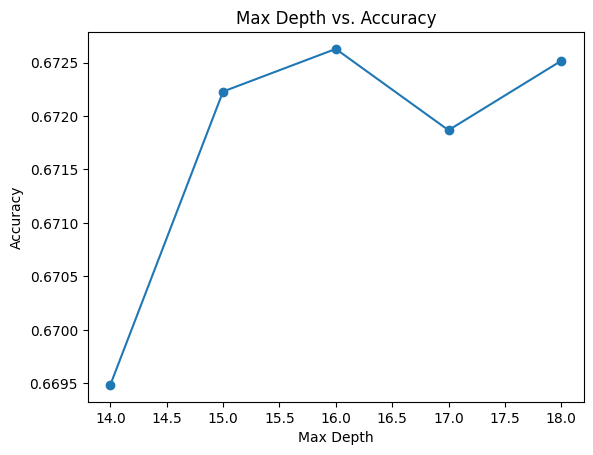

In [17]:
# just for testing 

# Create arrays to store max_depth and corresponding accuracies
depths = []
accuracies = []

# Loop through max depths from 1 to 10
for max_tree_depth in range(14, 19):

    # Create a Decision Tree classifier within a pipeline
    clf = Pipeline([
        ('classifier', DecisionTreeClassifier(max_depth=max_tree_depth, random_state=42))
    ])

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy, precision, recall and f1 of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Max Depth: {max_tree_depth}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1: {f1}")

    # Store depth and accuracy in arrays
    depths.append(max_tree_depth)
    accuracies.append(accuracy)

# Plotting the graph
plt.plot(depths, accuracies, marker='o')
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

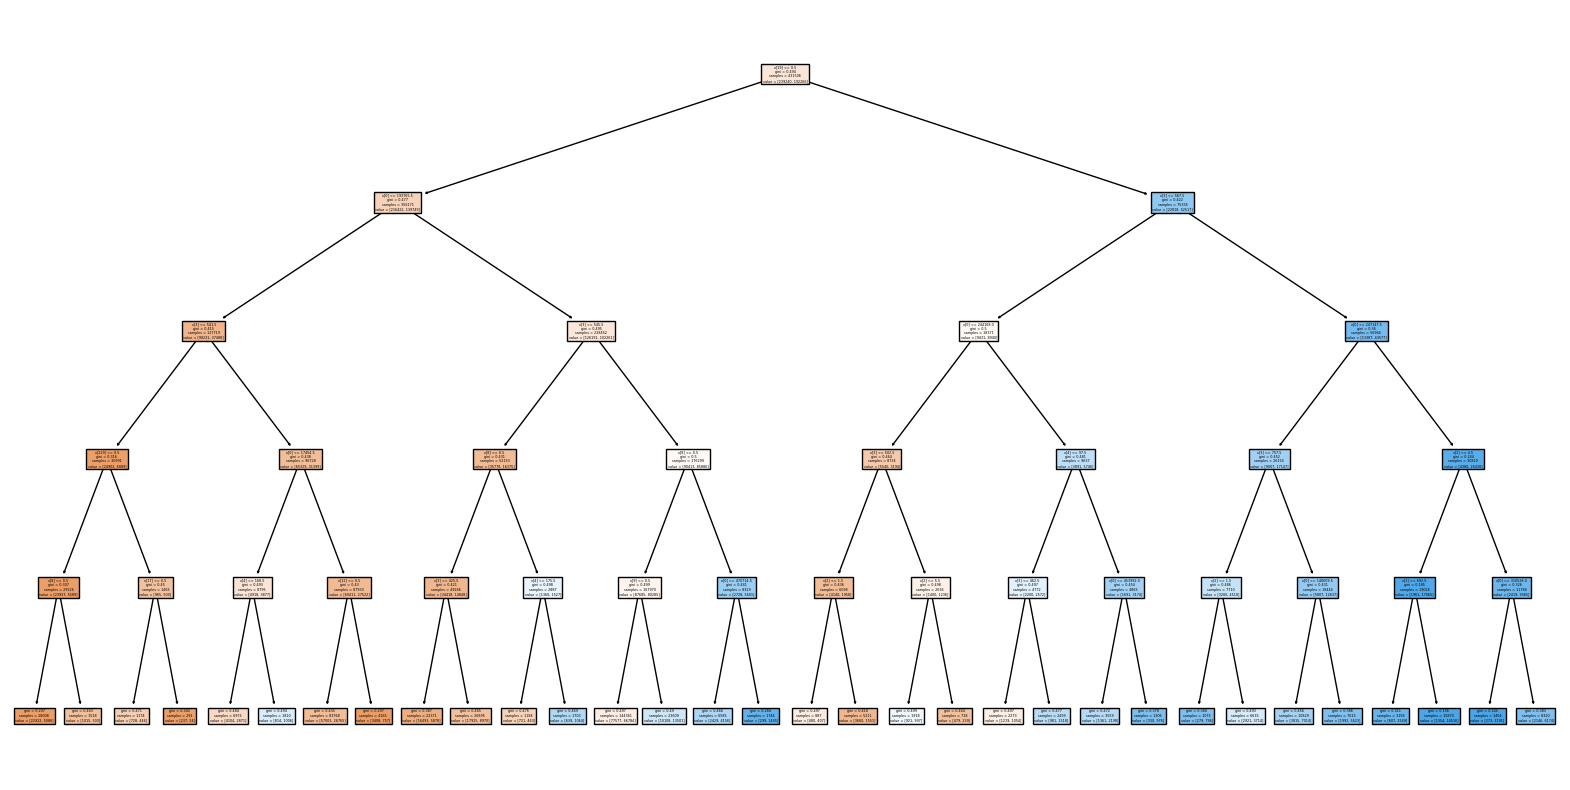

In [15]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf['classifier'], filled=True)
plt.show()


In [8]:
#Naive Bayes Classifier

model = GaussianNB()
model.fit(X_train,y_train)

#Test the Accuracy of the Classifier
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

Accuracy: 0.5999425271373879
Precision: 0.5686413521254573
Recall: 0.41776740697529063
F1 Score: 0.6113110558582375


**Random Forests**

In [16]:
max_tree_depth = 5 # max_depth=10 drinne lassen ???? ist nur drin, damit man es einfacher anpassen kann

# Create a Decision Tree classifier within a pipeline
clf = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= None)) 
])

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.68499309398667
Precision: 0.6621021465581051
Recall: 0.5963581815908996
F1-Score: 0.6275128795352406


In [ ]:

# testing different depths

# Create arrays to store max_depth and corresponding accuracies
depths = []
accuracies = []

# Loop through max depths
for max_tree_depth in range(1, 40):

    # Create a Random Forest classifier within a pipeline
    clf = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= max_tree_depth)) 
])

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy, precision, recall and f1 of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Max Depth: {max_tree_depth}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1: {f1}")
    
    # Store depth and accuracy in arrays
    depths.append(max_tree_depth)
    accuracies.append(accuracy)

# Plotting the graph
plt.plot(depths, accuracies, marker='o')
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()